In [ ]:
#KNN Algorithm

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas_datareader as web
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_cipla=pd.read_csv("/content/drive/MyDrive/Python Colab Stuff Sem 3/Daily datasets for ML/CIPLA_day_data.csv")
print(df_cipla)

      Unnamed: 0                       date    close     high      low  \
0              0  2015-01-01 00:00:00+05:30   628.40   634.79   626.50   
1              1  2015-01-02 00:00:00+05:30   630.15   637.54   629.35   
2              2  2015-01-05 00:00:00+05:30   633.00   638.00   626.00   
3              3  2015-01-06 00:00:00+05:30   614.35   632.00   610.50   
4              4  2015-01-07 00:00:00+05:30   611.95   617.79   604.50   
...          ...                        ...      ...      ...      ...   
1902        1902  2022-10-17 00:00:00+05:30  1108.15  1113.05  1098.80   
1903        1903  2022-10-18 00:00:00+05:30  1125.85  1130.20  1110.30   
1904        1904  2022-10-19 00:00:00+05:30  1122.00  1145.00  1119.10   
1905        1905  2022-10-20 00:00:00+05:30  1136.80  1142.00  1117.00   
1906        1906  2022-10-21 00:00:00+05:30  1134.75  1148.00  1132.50   

         open   volume  
0      626.50   596787  
1      633.00   688999  
2      626.00  1282895  
3      631.

In [ ]:
corr=df_cipla.corr()
print(corr)

            Unnamed: 0     close      high       low      open    volume
Unnamed: 0    1.000000  0.629681  0.630624  0.628406  0.628230  0.274336
close         0.629681  1.000000  0.999094  0.999068  0.997853  0.095895
high          0.630624  0.999094  1.000000  0.998663  0.998898  0.109609
low           0.628406  0.999068  0.998663  1.000000  0.998938  0.080970
open          0.628230  0.997853  0.998898  0.998938  1.000000  0.090889
volume        0.274336  0.095895  0.109609  0.080970  0.090889  1.000000


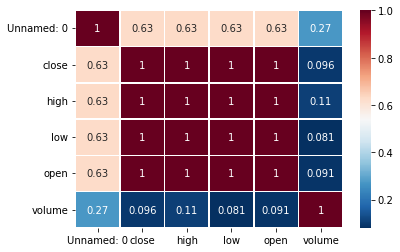

In [ ]:
import seaborn as sb
sb.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns,cmap='RdBu_r', annot=True, linewidth=0.5)

In [ ]:
df2_cipla = df_cipla['close']
print(df2_cipla.head())
df2_cipla = pd.DataFrame(df2_cipla)  
df2_cipla.head()
future_hours = 72
df2_cipla['Prediction'] = df2_cipla['close'].shift(-future_hours)
print(df2_cipla.tail())
# independent variable
X = np.array(df2_cipla.drop(['Prediction'], 1))[:-future_hours]
print("array df2 for close values till the start of 'n' future hours after dropping prediction column and ")
print(X)
#
y = np.array(df2_cipla['Prediction'])[:-future_hours]
print()
print(y)

0    628.40
1    630.15
2    633.00
3    614.35
4    611.95
Name: close, dtype: float64
        close  Prediction
1902  1108.15         NaN
1903  1125.85         NaN
1904  1122.00         NaN
1905  1136.80         NaN
1906  1134.75         NaN
array df2 for close values till the start of 'n' future hours after dropping prediction column and 
[[628.4 ]
 [630.15]
 [633.  ]
 ...
 [937.4 ]
 [945.6 ]
 [935.25]]

[ 652.6   656.7   663.95 ... 1122.   1136.8  1134.75]


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.25)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_regressor=KNeighborsRegressor(n_neighbors = 5,metric = 'minkowski',p = 2)
knn_model=knn_regressor.fit(x_train,y_train)
knn_confidence = knn_model.score(x_train,y_train)
print(knn_confidence)

0.8779520044628627


In [ ]:
x_future = np.array(df2_cipla.drop(['Prediction'], 1)) [-future_hours:]
print(x_future)

[[ 935.45]
 [ 947.55]
 [ 935.75]
 [ 953.35]
 [ 951.15]
 [ 966.05]
 [ 967.35]
 [ 960.65]
 [ 981.5 ]
 [ 968.5 ]
 [ 972.1 ]
 [ 959.8 ]
 [ 955.7 ]
 [ 974.05]
 [ 967.45]
 [ 977.4 ]
 [1004.55]
 [1004.2 ]
 [1011.85]
 [1044.5 ]
 [1034.2 ]
 [1029.55]
 [1038.35]
 [1038.4 ]
 [1027.15]
 [1034.55]
 [1025.75]
 [1032.2 ]
 [1030.1 ]
 [1022.55]
 [1040.65]
 [1037.35]
 [1025.75]
 [1020.8 ]
 [1017.3 ]
 [1038.45]
 [1023.  ]
 [1015.6 ]
 [1025.65]
 [1040.85]
 [1051.5 ]
 [1056.05]
 [1058.3 ]
 [1064.75]
 [1058.9 ]
 [1059.95]
 [1033.3 ]
 [1043.5 ]
 [1036.3 ]
 [1092.3 ]
 [1070.4 ]
 [1061.9 ]
 [1068.1 ]
 [1065.65]
 [1098.7 ]
 [1097.15]
 [1115.85]
 [1114.95]
 [1130.75]
 [1144.65]
 [1134.45]
 [1130.5 ]
 [1118.85]
 [1110.1 ]
 [1108.45]
 [1103.65]
 [1108.9 ]
 [1108.15]
 [1125.85]
 [1122.  ]
 [1136.8 ]
 [1134.75]]


In [ ]:
y_knn_pred = knn_model.predict(x_future)
print(y_knn_pred)

[998.78 988.73 998.78 981.62 918.05 978.25 987.92 929.31 965.46 960.47
 998.3  944.66 951.32 952.67 987.92 975.08 972.38 972.38 964.75 938.63
 957.69 962.27 950.67 950.67 962.27 957.69 962.27 964.01 962.27 963.96
 946.2  950.67 962.27 959.33 954.46 950.67 956.2  954.46 962.27 946.2
 938.63 941.01 941.01 941.01 941.01 941.01 964.01 946.2  950.67 941.01
 941.01 941.01 941.01 941.01 941.01 941.01 941.01 941.01 941.01 941.01
 941.01 941.01 941.01 941.01 941.01 941.01 941.01 941.01 941.01 941.01
 941.01 941.01]


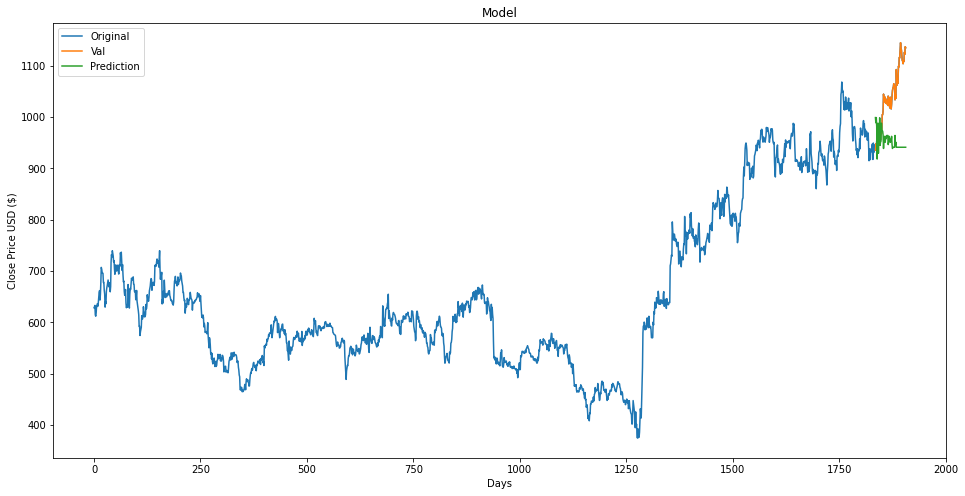

In [ ]:
prediction = y_knn_pred
valid = df2_cipla[x.shape[0]:]
valid['Predictions'] = prediction
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df_cipla[ 'close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend (['Original', 'Val', 'Prediction'])
plt.show()

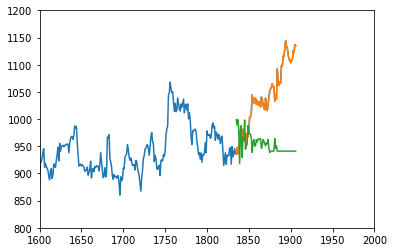

In [ ]:
plt.plot(df_cipla['close'])
plt.plot(valid[['close', 'Predictions']])
plt.xlim(1600, 2000)
plt.ylim(800, 1200)
plt.show()

In [ ]:
#SVM Algorithm

In [ ]:
from sklearn.svm import SVR
svm_regressor = SVR(kernel='linear')
svm_model=svm_regressor.fit(x_train,y_train)
y_svm_pred=svm_model.predict(x_future)

In [ ]:
import sklearn
import math
from sklearn.metrics import r2_score
print("The predicted values of close for the next 'n' days")
print(y_svm_pred)
print("The Accuracy is : " , r2_score(x_train,y_train))

The predicted values of close for the next 'n' days
[ 946.26513513  670.41579391  903.00435562  491.87845787  643.58817091
  595.42714292  539.2475265   614.28567495  546.72164288  478.81112859
  459.9030991   647.24108344  634.2331511   603.59422372  607.85100524
  592.25930553  572.06434209  904.29128956  605.17814243  493.0663969
  844.8943383   572.06434209  565.03570286  943.79026216  943.79026216
  560.13545438  744.41449573  553.15631261  647.20148547  531.52592284
  589.38845287  931.41589732  930.17846083  785.89336668  527.36813625
  497.22418348  776.98382399  655.02208404  610.87035028  501.57995991
  900.38099028  962.00532721  749.85921624  573.35127603  581.02338224
  772.23206789  922.5558521   581.96383397  964.72768749  607.95000015
  517.5676393   665.16906323  738.47480058  671.6532304   574.7372049
  651.50776443  538.80204938  986.95204677  549.54299806  509.99452801
  674.92006271  646.36002864  660.60539746  532.76335932  704.61853836
  562.21434767  584.8346866

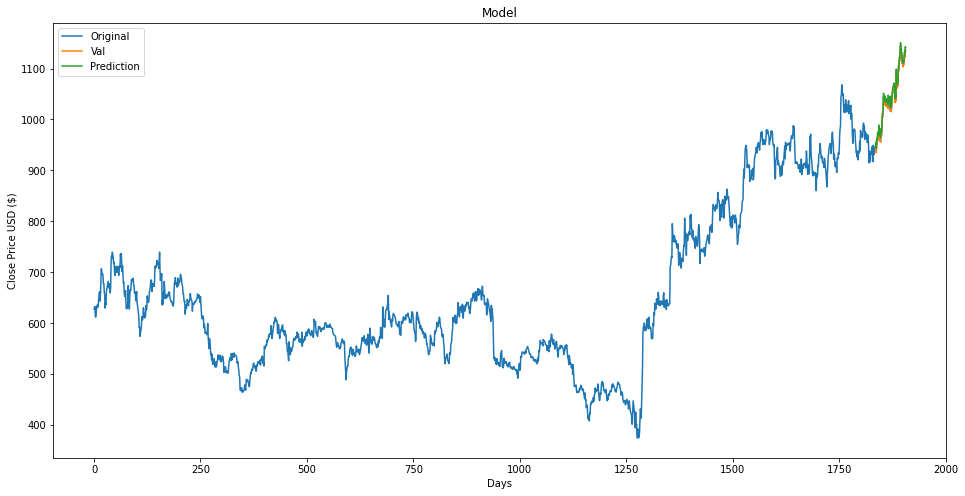

In [ ]:
prediction = y_svm_pred
valid = df2_cipla[x.shape[0]:]
valid['Predictions'] = prediction
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df_cipla[ 'close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend (['Original', 'Val', 'Prediction'])
plt.show()

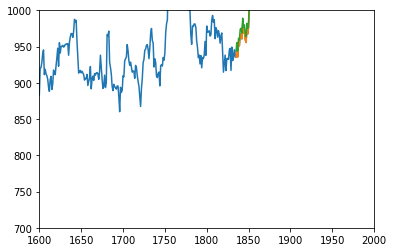

In [ ]:
plt.plot(df_cipla['close'])
plt.plot(valid[['close', 'Predictions']])
plt.xlim(1600, 2000)
plt.ylim(700, 1000)
plt.show()